In [1]:
import numpy as np
from matplotlib import pyplot as plt
#import h5py

import time, os, re, sys

from sklearn import utils
from sklearn import model_selection 
from sklearn import preprocessing
from sklearn import metrics

from sklearn.model_selection import train_test_split, ParameterGrid

# K-fold validation
from sklearn.model_selection import RepeatedStratifiedKFold

# PCA
from sklearn.decomposition import PCA

# Scoring
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
# from sklearn.metrics import roc_curve, auc
from sklearn import metrics

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import imblearn
from sklearn.metrics import accuracy_score, make_scorer
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix

# Classificatori
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
import pickle

classifier = "NeuralNetwork"
with open(rf"../../Results/gr_{classifier}2.pkl", 'rb') as file:
 
    results = pickle.load(file)
 
    
df = pd.DataFrame(results.cv_results_)

print(df.columns)
df.tail()

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_activation', 'param_early_stopping', 'param_hidden_layer_sizes',
       'param_learning_rate', 'param_learning_rate_init',
       'param_n_iter_no_change', 'param_tol', 'params', 'split0_test_f1_macro',
       'split1_test_f1_macro', 'split2_test_f1_macro', 'split3_test_f1_macro',
       'split4_test_f1_macro', 'split5_test_f1_macro', 'split6_test_f1_macro',
       'split7_test_f1_macro', 'split8_test_f1_macro', 'split9_test_f1_macro',
       'mean_test_f1_macro', 'std_test_f1_macro', 'rank_test_f1_macro',
       'split0_test_Accuracy', 'split1_test_Accuracy', 'split2_test_Accuracy',
       'split3_test_Accuracy', 'split4_test_Accuracy', 'split5_test_Accuracy',
       'split6_test_Accuracy', 'split7_test_Accuracy', 'split8_test_Accuracy',
       'split9_test_Accuracy', 'mean_test_Accuracy', 'std_test_Accuracy',
       'rank_test_Accuracy', 'split0_test_AUC', 'split1_test_AUC',
       'split2_test

c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MLPClassifier from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator LabelBinarizer from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\utente\anaconda3\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator GridSearchCV from version 1.0.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own ris

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
139    3521.252124   1025.720482        21.582396        3.175224   
140    1742.851876    412.048766        15.736197       15.845425   
141   13168.084601   3259.839126        83.688189       11.117563   
142    4392.706906   1334.847753        23.640470        3.535119   
143    1617.253101    500.140882        11.583217       10.727876   

    param_activation param_early_stopping param_hidden_layer_sizes  \
139             relu                 True       [128, 128, 64, 64]   
140             relu                 True       [128, 128, 64, 64]   
141             relu                 True       [128, 128, 64, 64]   
142             relu                 True       [128, 128, 64, 64]   
143             relu                 True       [128, 128, 64, 64]   

    param_learning_rate param_learning_rate_init param_n_iter_no_change  ...  \
139            constant                     0.01                     15  ...   
140            constant                      0.1                     15  ...   
141          invscaling                    0.001                     15  ...   
142          invscaling                     0.01                     15  ...   
143          invscaling                      0.1                     15  ...   

    split3_test_AUC split4_test_AUC  split5_test_AUC  split6_test_AUC  \
139        0.999036        0.998971         0.999216         0.999184   
140        0.985551        0.984705         0.500003         0.975720   
141        0.999585        0.999399         0.999678         0.999586   
142        0.998903        0.999197         0.999102         0.999088   
143        0.987328        0.987658         0.985013         0.987026   

     split7_test_AUC  split8_test_AUC  split9_test_AUC  mean_test_AUC  \
139         0.999138         0.999027         0.999146       0.999067   
140         0.987536         0.987606         0.982936       0.912283   
141         0.999647         0.999667         0.999540       0.999596   
142         0.999188         0.999142         0.999090       0.999089   
143         0.986931         0.500000         0.500000       0.791960   

     std_test_AUC  rank_test_AUC  
139      0.000149             49  
140      0.154787            141  
141      0.000077              1  
142      0.000078             45  
143      0.238385            142  

[5 rows x 51 columns]

In [3]:

scoring = {"f1_macro": "f1_macro", "Accuracy": make_scorer(accuracy_score), "AUC":"roc_auc"}

idx_best = []
for metric in scoring:
    idx_best.append(df[f'rank_test_{metric}'].idxmin())


In [4]:
    
if idx_best.count(idx_best[0]) == len(idx_best):
    print("########## We have a winner! ##########")
    print(f"The best classificator is - idx {idx_best[0]}")
    print(df.loc[idx_best[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][idx_best[0]]*100:.4f}, std = {df['std_test_' + metric][idx_best[0]]*100:.4f}")
else:
    print("Oh-oh there are more best estimators...")
    for i, met in zip(idx_best, scoring):
        print(f"Best classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][i]*100:.4f}, std = {df['std_test_' + metric][i]*100:.4f}")




########## We have a winner! ##########
The best classificator is - idx 141
{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': array([128, 128,  64,  64], dtype=int64), 'learning_rate': 'invscaling', 'learning_rate_init': 0.001, 'n_iter_no_change': 15, 'tol': 0.0001}
Scorer results:
- f1_macro --> Mean = 99.8314, std = 0.0231
- Accuracy --> Mean = 99.8314, std = 0.0231
- AUC --> Mean = 99.9596, std = 0.0077


In [5]:

idx_worst = []
for metric in scoring:
    idx_worst.append(df[f'rank_test_{metric}'].idxmax())
    
    
if idx_worst.count(idx_worst[0]) == len(idx_worst):
    print("########## We have a loser! ##########")
    print("The worst classificator is:")
    print(df.loc[idx_worst[0]]['params'])
    print("Scorer results:")
    for metric in scoring:
        print(f"- {metric} --> Mean = {df['mean_test_' + metric][idx_worst[0]]:5f}, std = {df['std_test_' + metric][idx_worst[0]]:4f}")
else:
    print("Oh-oh there are more worst estimators...")
    for i, met in zip(idx_worst, scoring):
        print(f"Worst classificator for the metric {met} - idx {i}")
        print(df.loc[i]['params'])
        print("Scorer results:")
        for metric in scoring:
            print(f"- {metric} --> Mean = {df['mean_test_' + metric][i]}, std = {df['std_test_' + metric][i]}")



########## We have a loser! ##########
The worst classificator is:
{'activation': 'relu', 'early_stopping': True, 'hidden_layer_sizes': array([128,  64,  32,  16], dtype=int64), 'learning_rate': 'invscaling', 'learning_rate_init': 0.1, 'n_iter_no_change': 15, 'tol': 0.0001}
Scorer results:
- f1_macro --> Mean = 0.659907, std = 0.326575
- Accuracy --> Mean = 0.743241, std = 0.243243
- AUC --> Mean = 0.743244, std = 0.243245


In [6]:
dati = np.load("../Dataset/dati.npz")
X_raw = dati["X"]
y_raw = dati["y"]

# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X_raw, y_raw)

scaler = preprocessing.StandardScaler()

scaler.fit(X)
X_scaled = scaler.transform(X)

scaler.fit(X_raw)
X_scaled_raw = scaler.transform(X_raw)

# Applico la PCA
pca = PCA()
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)


thrEV = .95     # Soglia Explained Variance per pruning componenti

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature} features ")

pca = PCA()
pca.fit(X_scaled_raw)
X_pca_raw = pca.transform(X_scaled_raw)

# Estraggo le Explained Variances
EV = pca.explained_variance_ratio_
cumEV = np.cumsum(EV)


# Stabilisco che componenti tenere per il pruning
# Le componenti sono già ordinate
idxLastFeature_raw = np.sum(cumEV <= thrEV)
print(f"To have {thrEV * 100} % of Explaied Variance, we need {idxLastFeature_raw} features ")


# Pruno tenendo solo le prime componenti più informative
X_pruned = X_pca[:,:idxLastFeature]     # Pruno
X_pruned_raw = X_pca_raw[:,:idxLastFeature]     # Pruno


To have 95.0 % of Explaied Variance, we need 7 features 
To have 95.0 % of Explaied Variance, we need 8 features 


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_pruned, y, test_size=0.2, random_state=0)

In [8]:
idx = [idx_best[0]]

y_pred = []
y_pred_proba = []

y_pred_raw = []
y_pred_proba_raw = []

for i in idx:
    params = df.loc[i]['params']
    clf = MLPClassifier(**params)
    clf = clf.fit(X_train, y_train)
    y_pred.append(clf.predict(X_test))
    y_pred_proba.append(clf.predict_proba(X_test)[:,1])
    y_pred_raw.append(clf.predict(X_pruned_raw))
    y_pred_proba_raw.append(clf.predict_proba(X_pruned_raw)[:,1])


In [9]:
cf_matrix = []

print('#### Dataset resamplato ###')


for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix.append(metrics.confusion_matrix(y_test, y_pred[i]))
    accuracy        =   metrics.accuracy_score(y_test, y_pred[i])
    precision       =   metrics.precision_score(y_test, y_pred[i])
    recall          =   metrics.recall_score(y_test, y_pred[i])
    f1              =   metrics.f1_score(y_test, y_pred[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")

print('#### Dataset originale ###')

cf_matrix_raw = []

for i, s in enumerate(idx):
    print(f"For idx = {s}")
    cf_matrix_raw.append(metrics.confusion_matrix(y_raw, y_pred_raw[i]))
    accuracy        =   metrics.accuracy_score(y_raw, y_pred_raw[i])
    precision       =   metrics.precision_score(y_raw, y_pred_raw[i])
    recall          =   metrics.recall_score(y_raw, y_pred_raw[i])
    f1              =   metrics.f1_score(y_raw, y_pred_raw[i])


    print(f"-- accuracy = {accuracy:.4f}")
    print(f"-- precision = {precision:.4f}")
    print(f"-- recall = {recall:.4f}")
    print(f"-- f1 = {f1:.4f}")



#### Dataset resamplato ###
For idx = 141
-- accuracy = 0.9986
-- precision = 0.9972
-- recall = 0.9999
-- f1 = 0.9986
#### Dataset originale ###
For idx = 141
-- accuracy = 0.9668
-- precision = 0.0000
-- recall = 0.0000
-- f1 = 0.0000


[[4.98688241e+01 1.38047724e-01]
 [3.97039915e-03 4.99891578e+01]]


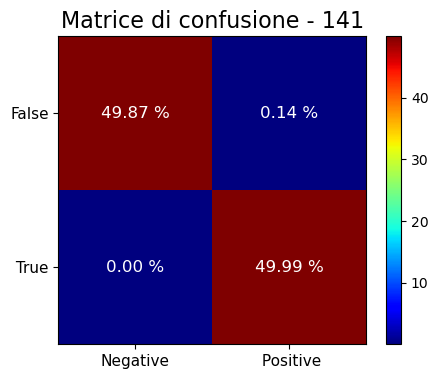

In [10]:
fig, ax = plt.subplots()
fig.set_size_inches(5,4)


mat = cf_matrix[0]
myConfMat = np.array(mat)
myConfMat = myConfMat/np.sum(myConfMat)
myConfMat *= 100

print(myConfMat)

# Plotto la matrice di covarianza
im = ax.imshow(myConfMat, cmap = "jet", origin = "upper")

ax.set_title(f"Matrice di confusione - {idx[0]}", fontsize = 16)

# Stampo i valori sulle celle
for i in range(myConfMat.shape[0]):
    for j in range(myConfMat.shape[1]):
        text = ax.text(j, i, f"{myConfMat[i, j]:.2f} %",
                    ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
        
ax.set_xticks((0,1))
ax.set_xticklabels(['Negative',' Positive'], rotation='horizontal', fontsize=11)

ax.set_yticks((0,1))
ax.set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


# Disegno la colorbar
fig.colorbar(im)


plt.show()

fig.savefig(f"../Relazione/Grafici/{classifier}-conf-matrix.eps", format = "eps", bbox_inches = "tight")


In [11]:
fig, ax = plt.subplots(1,2)
fig.set_size_inches(10,4)

ax = ax.flatten()

for k, mat in enumerate(cf_matrix_raw):

    myConfMat = np.array(mat)
    myConfMat = myConfMat/np.sum(myConfMat)
    myConfMat *= 100



    # Plotto la matrice di covarianza
    im = ax[k].imshow(myConfMat, cmap = "jet", origin = "upper")

    ax[k].set_title(f"Matrice di confusione - {idx[k]}", fontsize = 16)

    # Stampo i valori sulle celle
    for i in range(myConfMat.shape[0]):
        for j in range(myConfMat.shape[1]):
            text = ax[k].text(j, i, f"{myConfMat[i, j]:.2f} %",
                        ha="center", va="center", color="w", fontsize = "large")#weight="semibold")
            
    ax[k].set_xticks((0,1))
    ax[k].set_xticklabels(['Negative',' Positive'], rotation='horizontal', fontsize=11)

    ax[k].set_yticks((0,1))
    ax[k].set_yticklabels(['False',' True'], rotation='horizontal', fontsize=11)


    # Disegno la colorbar
    fig.colorbar(im)


plt.show()

fig.savefig(f"../Relazione/Grafici/{classifier}-conf-matrix-raw.eps", format = "eps", bbox_inches = "tight")


In [12]:
nrocstep = 100000                            # Numero punti per curva ROC
xROC = np.linspace(0,1,nrocstep)           # Vettore su cui interpolare curva ROC
yROC_lst = []

auc = []
for i,y in enumerate(y_pred_proba):
    # *** ROC Curve ***

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y)

    # Creo un'interpolazione denza per miglior calcolo aree
    yROC = np.interp(xROC, fpr, tpr)
    yROC_lst.append(yROC)
    #myAuc = metrics.auc(fpr, tpr)
    myAUC = metrics.auc(xROC, yROC)
    auc.append(myAUC)
    print(f"{idx[i]} --> AUC = {myAUC}")





141 --> AUC = 0.9996285939314745


In [13]:
fig, ax = plt.subplots()
fig.set_size_inches(5,4)



for i, yROC in enumerate(yROC_lst):
    
    #create ROC curve
    ax.plot(xROC,yROC, c  = "hotpink", label = f"AUC = {auc[i]*100:.2f}%")
    ax.set_ylabel('True Positive Rate')
    ax.set_xlabel('False Positive Rate')
    ax.set_title(f"Curva ROC - {idx[i]}", fontsize = 16)
    ax.legend()


plt.show()

fig.savefig(f"../Relazione/Grafici/{classifier}-roc-curve.eps", format = "eps", bbox_inches = "tight")



The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


: 